In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/csv_data/train.csv') # Importing dataset from drive

# **Data** **Exploration** **&** **Pre** **Processing**

In [ ]:
display(train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Observation:**
1.   Since the survival of a passanger won't depend on the name and passanger id of the passanger hence we will drop these columns
2.   Ticket data needs proper cleaning as it contains strings and numerical values both




In [ ]:
train2 = train.drop(['PassengerId', 'Name'], axis='columns')

In [ ]:
for col in train2.columns.values: # For each column

    unique_values = pd.unique(train2[col].astype(str)) # Create a list of unique values
    print('\n' + col + ' is of data type ' + str(train2[col].dtypes) + ', has ' + str(len(unique_values)) + ' unique values, and ' + str(train2[col].isnull().sum()) + ' null values')

    if len(unique_values) < 10: # If the column have less than 10 unique then print them

        list_str = ''

        for n_value in range(0, len(unique_values)):
            list_str = list_str + str(sorted(unique_values)[n_value]) + ', '

        print('    These are: ' + list_str[0:len(list_str)-2])


Survived is of data type int64, has 2 unique values, and 0 null values
    These are: 0, 1

Pclass is of data type int64, has 3 unique values, and 0 null values
    These are: 1, 2, 3

Sex is of data type object, has 2 unique values, and 0 null values
    These are: female, male

Age is of data type float64, has 89 unique values, and 177 null values

SibSp is of data type int64, has 7 unique values, and 0 null values
    These are: 0, 1, 2, 3, 4, 5, 8

Parch is of data type int64, has 7 unique values, and 0 null values
    These are: 0, 1, 2, 3, 4, 5, 6

Ticket is of data type object, has 681 unique values, and 0 null values

Fare is of data type float64, has 248 unique values, and 0 null values

Cabin is of data type object, has 148 unique values, and 687 null values

Embarked is of data type object, has 4 unique values, and 2 null values
    These are: C, Q, S, nan


**Observation:**
1.   Survived column contains only two values (1- Survived, and 0- Not Survived)
2.   Pclass column contains only three ordinal values (which are 1, 2, and 3)
3.   As sex column contains categorical values hence it needs to be One Hot Encoded
4.   177 values are missing from age column hence we need to replace them with some appropriate value
5.   Ticket data needs proper cleaning and processing as it contains strings and numerical values both
6.   Cabin data contains a lot of missing values which can be concluded as these passenger did not have a Cabin. I will mark this column later as:
(1 - Passanger had a cabin, 0 - Passanger didn't have a cabin). If doing so doesn't work for our model we may drop this column as well
7.   Embarked data contains categorical data hence it needs to be One Hot Encoded and missing values will be replaced with meadian

# Tackling ticket data

In [ ]:
ticket_stats = train2['Ticket'].value_counts(ascending=False)
display(ticket_stats)

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

Text(0, 0.5, 'Counts')

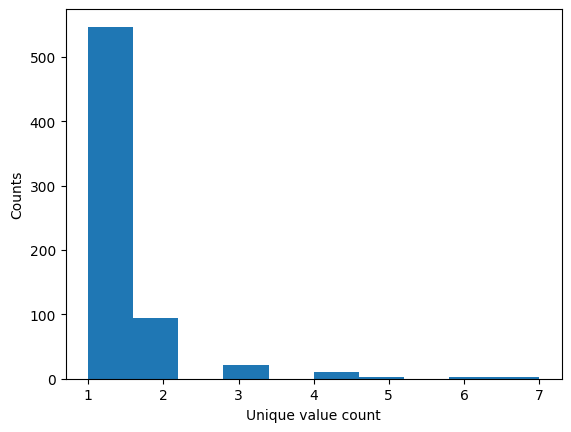

In [ ]:
plt.hist(ticket_stats)
plt.xlabel('Unique value count')
plt.ylabel('Counts')

**Observation:**
1.   Ticket feature has large number of random unique values. Some of them are strings some are nuerical.
2.   Some of the ticket values repeat 2 to 7 times but they are very less in number. Ticket value does not seem to contain to any relevent information. Hence we will drop this feature.


In [ ]:
train3 = train2.drop(['Ticket'], axis='columns') # Droping Ticket feature

# Pre processing of data

In [ ]:
train3['Cabin'] = train3['Cabin'].fillna(0) # Replacing all the null values with 0
train3['Cabin'] = train3['Cabin'].apply(lambda x: 1 if x != 0 else x) # Replacing values other than null values with 1

Text(20.72222222222222, 0.5, 'Survived')

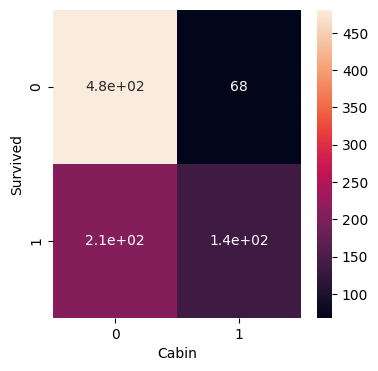

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(train3.Survived, train3.Cabin)

# Plotting covariance matrix to understand the relation between survived passanger and Cabin feature
import seaborn as sn
plt.figure(figsize= (4,4))
sn.heatmap(cm, annot=True, cbar= True)
plt.xlabel('Cabin')
plt.ylabel('Survived')

**Observation:**
1.   Matrix clearly shows that most of the passangers having cabin survived (about 140+ passangers survived and 68 didn't)
2.   Most of the passangers not having cabin died (about 480+ passangers died but only 210+ survived)
3.   As this feature contains information related to truth value hence this columns shouldn't be dropped despite having lots of null values.



In [ ]:
median_male_age = train3.Age[(train3['Sex']=='male')].median()
print('Median age of male passangers is:', median_male_age)
median_female_age = train3.Age[(train3['Sex']=='female')].median()
print('Median age of female passangers is:',median_female_age)

Median age of male passangers is: 29.0
Median age of female passangers is: 27.0


**Observation:**
1.  Median age of the all males is 29 and males mode age of all the female is also 27.
2.   We can apply the same concept in other features as well (for eg. in Cabin)
3.   This type of analysis would help us in assigning a better approximate of the age then just assigning such a large number of missing data points by a single value

In [ ]:
median_cabin_age = train3.Age[(train3['Cabin']==1)].median()
print('Median age of a passangers having a cabin is:',median_cabin_age)
median_non_cabin_age = train3.Age[(train3['Cabin']==0)].median()
print('Median age of a passangers not having a cabin is:',median_non_cabin_age)

Median age of a passangers having a cabin is: 36.0
Median age of a passangers not having a cabin is: 26.0


**Observation:**
1.   People having a cabin has higher median age than those who do not have a cabin
2.   Hence we will replace null values of the Age column with two values (36 whenever a person has a Cabin and 26 Otherwise)



In [ ]:
# Filling 2 null values in Embarked column
most_common_val = train3['Embarked'].mode()
train3['Embarked'] = train3['Embarked'].fillna(most_common_val[0])

In [ ]:
for col in train3.columns.values: # For each column

    unique_values = pd.unique(train3[col].astype(str)) # Create a list of unique values
    print('\n' + col + ' is of data type ' + str(train3[col].dtypes) + ', has ' + str(len(unique_values)) + ' unique values, and ' + str(train3[col].isnull().sum()) + ' null values')

    if len(unique_values) < 10: # If the column have less than 10 unique then print them

        list_str = ''

        for n_value in range(0, len(unique_values)):
            list_str = list_str + str(sorted(unique_values)[n_value]) + ', '

        print('    These are: ' + list_str[0:len(list_str)-2])


Survived is of data type int64, has 2 unique values, and 0 null values
    These are: 0, 1

Pclass is of data type int64, has 3 unique values, and 0 null values
    These are: 1, 2, 3

Sex is of data type object, has 2 unique values, and 0 null values
    These are: female, male

Age is of data type float64, has 89 unique values, and 177 null values

SibSp is of data type int64, has 7 unique values, and 0 null values
    These are: 0, 1, 2, 3, 4, 5, 8

Parch is of data type int64, has 7 unique values, and 0 null values
    These are: 0, 1, 2, 3, 4, 5, 6

Fare is of data type float64, has 248 unique values, and 0 null values

Cabin is of data type int64, has 2 unique values, and 0 null values
    These are: 0, 1

Embarked is of data type object, has 3 unique values, and 0 null values
    These are: C, Q, S


**Observation:**
1.  Only Age feature has missing values. Since too many data values of age data are missing I will fill them after spliting data into train test to avoid any bias in the model. (This spliting has been done just to check accuracy of the model. Later the Model has been trained on whole training dataset and tested over provided testing data )
2.  We are still not getting much idea about the distribution of fare. We need get some more insight of this feature.

In [ ]:
# defining a function to plot histograms in nice order
def get_column_histograms(df):
  num_cols_df = len(df.columns.values)
  n_rows_in_hist = int(np.ceil( np.sqrt(num_cols_df) ))
  while num_cols_df % n_rows_in_hist is not 0:
    n_rows_in_hist -= 1
  # on exiting the loop, n_rows_in_hist is a factor of num_cols_df
  n_cols_in_hist = int(num_cols_df/ n_rows_in_hist)
  count = 1
  for col in df.columns.values:
    plt.subplot(n_rows_in_hist, n_cols_in_hist, count)
    plt.tight_layout()
    plt.hist(df[col])
    plt.xlabel(col)
    plt.ylabel("counts")
    count = count + 1
  plt.show()

In [ ]:
survived_data = train3[(train3['Survived']==1)] # Data of survived passangers only
not_survived_data = train3[~(train3['Survived']==1)] # Data of died passangers only

Histograms of the passangers who survived


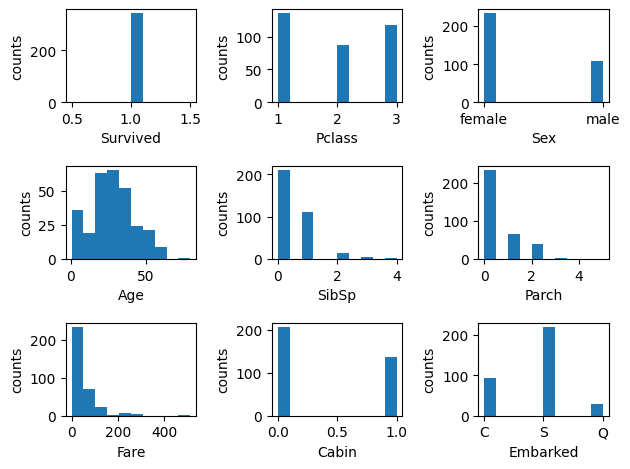


Histograms of the passangers who did not survive


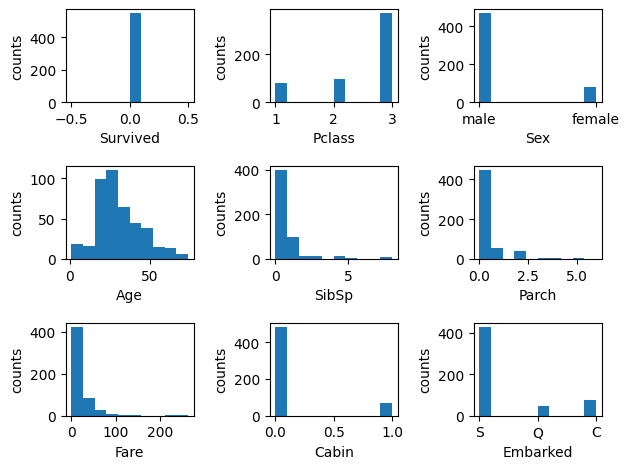

In [ ]:
print('Histograms of the passangers who survived')
get_column_histograms(survived_data) # Histogram of survived passangers data

print('\nHistograms of the passangers who did not survive')
get_column_histograms(not_survived_data) # Histogram of died passangers data

**Observation on comparing the two histograms:**
1.   More females survived than males whereas much more males died than females (i.e. This feature is helpul in our prediction modelling)
2.   Having a cabin also shows the higher survival rate than not having a cabin
3.   People who embarked from 'S' had lower chance of survival
5.   Passangers who paid higher fares had higher chances of survival
4.   It seems that this data contains enogh information to make a prediction model using this data



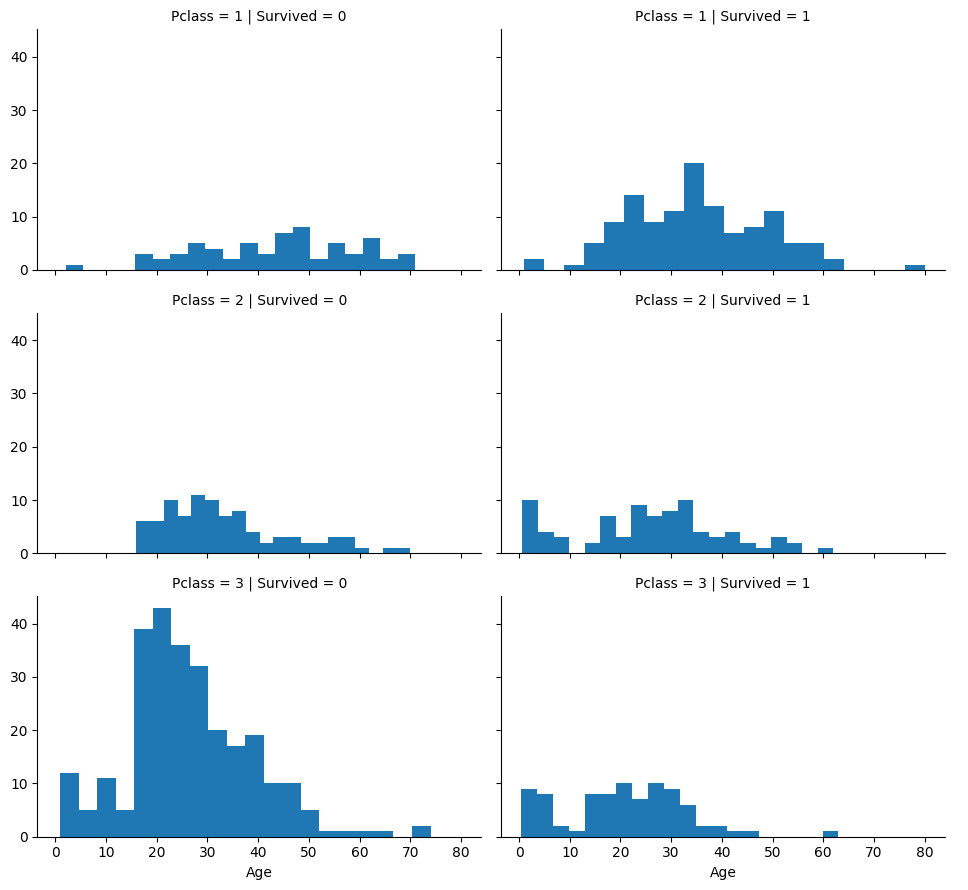

In [ ]:
grid = sn.FacetGrid(train3, col='Survived', row='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=1, bins=20)
grid.add_legend();

**Obseravation:**
1.  Most of the passangers from Pclass3 between 20-40 years of age did not survive

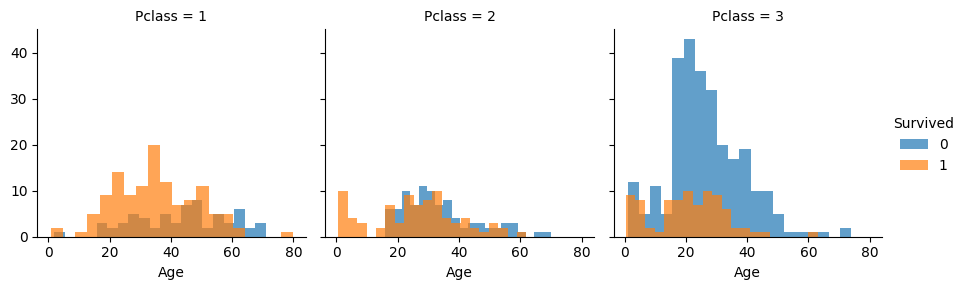

In [ ]:
grid = sn.FacetGrid(train3, col='Pclass', hue='Survived')
grid.map(plt.hist, 'Age', alpha=0.7, bins=20)
grid.add_legend();

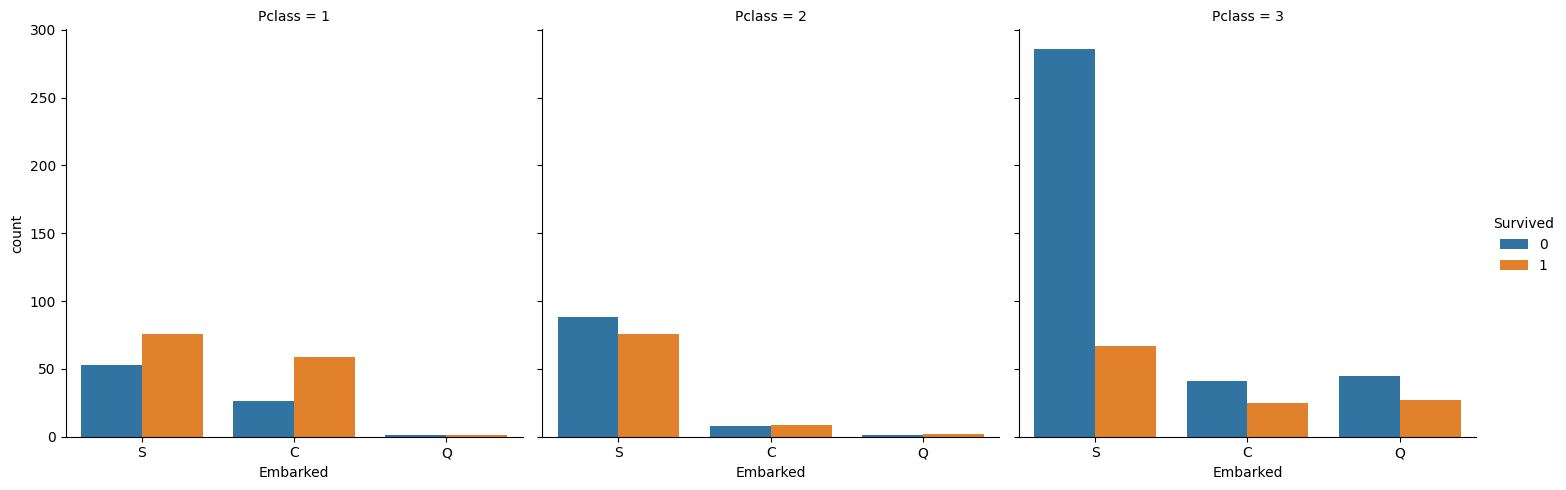

In [ ]:
# Countplot
sn.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = train3)

<Axes: xlabel='Pclass', ylabel='Age'>

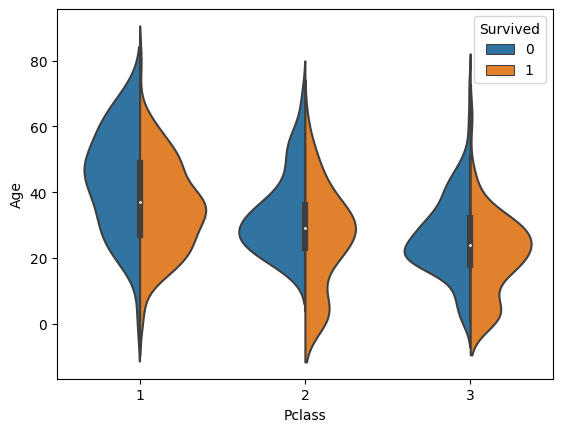

In [ ]:
# Violinplot Displays distribution of data
# across all levels of a category.
sn.violinplot(x ="Pclass", y ="Age", hue ="Survived", data = train3, split = True)

**Observations:**
1.   Most of the passangers from Pclass 3 did not survive
2.   In Pclass 1 more people were there who survived
3.   This analysis shows that better class people had higher chances of surviving which seems quite possible



**Observations:**
1. Chances of survival of women who embarked from 'S' and 'Q' is higher than males who embarked from 'S' and 'Q'
2. Chances of survival of men who embarked from 'C' is higher than males who embarked from 'C'

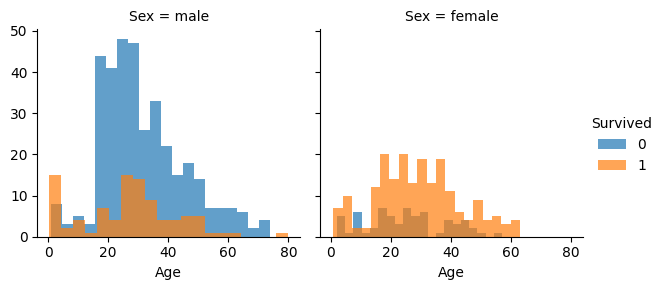

In [ ]:
grid = sn.FacetGrid(train3, col='Sex', hue='Survived')
grid.map(plt.hist, 'Age', alpha=0.7, bins=20)
grid.add_legend();

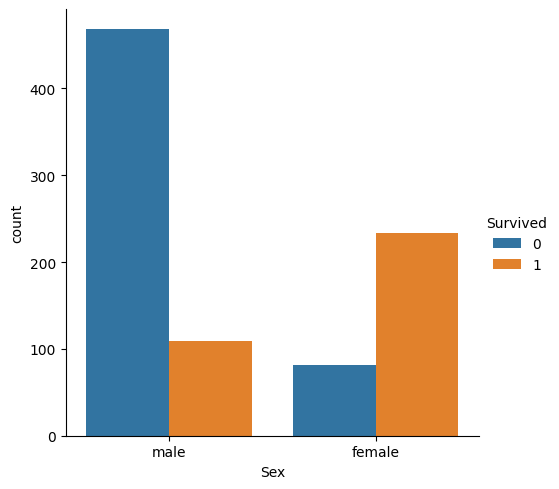

In [ ]:
# Countplot
sn.catplot(x ="Sex", hue ="Survived",
kind ="count", data = train3)

<Axes: xlabel='Sex', ylabel='Age'>

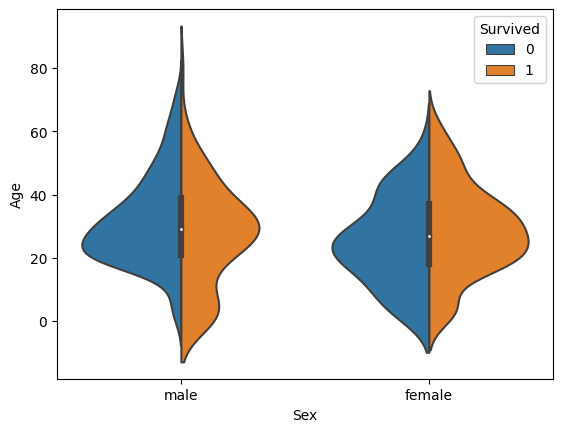

In [ ]:
# Violinplot Displays distribution of data
# across all levels of a category.
sn.violinplot(x ="Sex", y ="Age", hue ="Survived", data = train3, split = True)

**Observation:**
1. Females had much higher probability of survival than male passangers

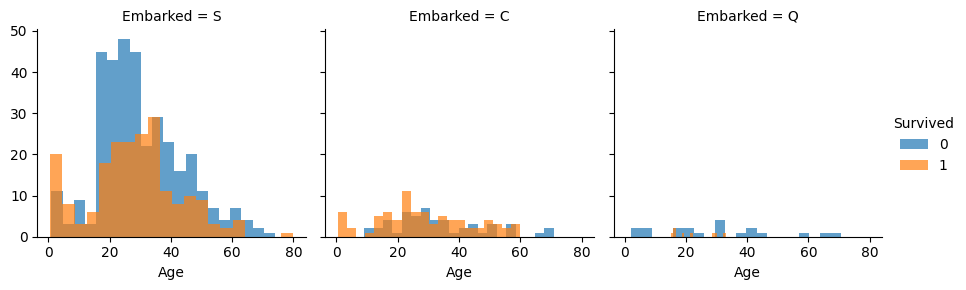

In [ ]:
grid = sn.FacetGrid(train3, col='Embarked', hue='Survived')
grid.map(plt.hist, 'Age', alpha=0.7, bins=20)
grid.add_legend();

<Axes: xlabel='Embarked', ylabel='Age'>

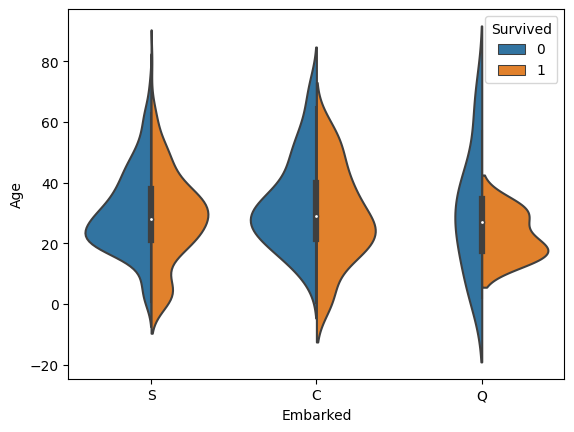

In [ ]:
sn.violinplot(x ="Embarked", y ="Age", hue ="Survived", data = train3, split = True)

# Removing outliers

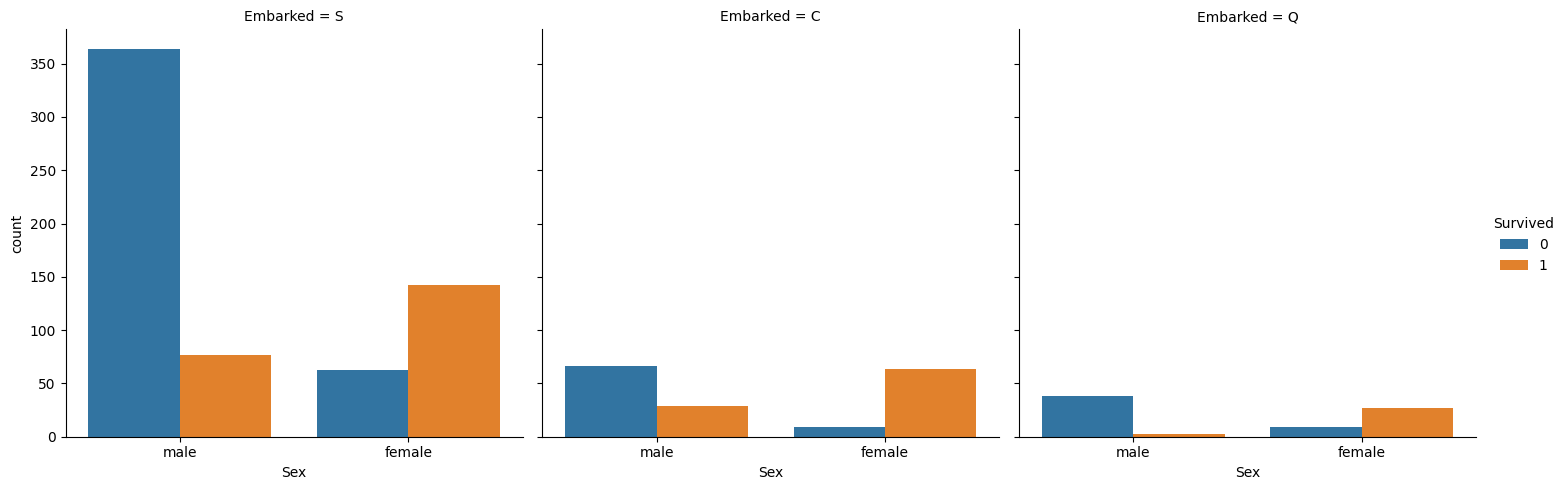

In [ ]:
# Countplot
sn.catplot(x ='Sex', hue ='Survived',
kind ='count', col ='Embarked', data = train3)

In [ ]:
print(train3['Fare'].describe()) # only this feature contains data values as ratio, hence I will check for this only

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


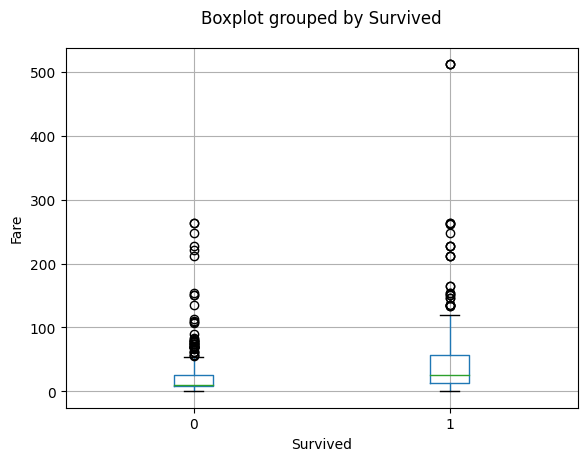

In [ ]:
train3.boxplot(by= 'Survived', column= 'Fare', grid= True)
plt.ylabel('Fare')
plt.title(' ')
plt.show()

<Axes: xlabel='Fare_Range', ylabel='Survived'>

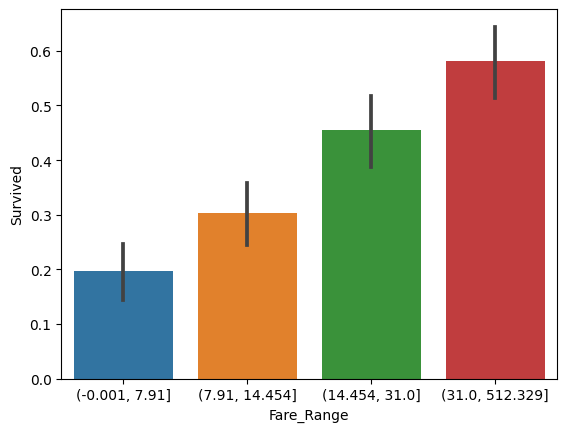

In [ ]:
# Divide Fare into 4 bins
train3['Fare_Range'] = pd.qcut(train3['Fare'], 4)

# Barplot - Shows approximate values based
# on the height of bars.
sn.barplot(x ='Fare_Range', y ='Survived', data = train3)

In [ ]:
train3 = train3.drop('Fare_Range', axis = 'columns')

In [ ]:
display(train3[train3.Fare> 500])

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
258,1,1,female,35.0,0,0,512.3292,0,C
679,1,1,male,36.0,0,1,512.3292,1,C
737,1,1,male,35.0,0,0,512.3292,1,C


**Observation:**
1.   I won't remove all the outliers as we recognised from earlier analysis that fare is one of the major deciding factor of survival rate
2.   Some values are even higher than 500 which is much higher than any other values. Although they might be correct data but such outliers may affect the accuracy of our model hence we will drop these rows.
3.   This data shows that these passangers paid a lot for the ticket and they survived as well (which sounds right as they might have been given priority). Still we will drop these rows as such values are very very rare in our data.


In [ ]:
train4 = train3[(train3.Fare < 500)] # Dropping very large fare data rows

## Using One Hot Encoding

In [ ]:
dummies1 = pd.get_dummies(train4.Sex) # get dummy variables for Sex feature
dummies2 = pd.get_dummies(train4.Embarked) # get dummy variables for Embarked feature

In [ ]:
# One of the dummy variable should be dropped for each feature
train5 = pd.concat([train4.drop(['Sex','Embarked'], axis='columns'), dummies1.drop('female',axis='columns'), dummies2.drop('C', axis='columns')], axis='columns')
train5.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,1


# Spliting the Data

In [ ]:
# This data will be used later on to train final model
X = train5.drop('Survived', axis='columns')
y = train5['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state= 1)

# Filling Null Values in Age Feature and Correlation Matrix

In [ ]:
def fill_age_null(df): # defining a function which fills the null values in age column with appropriate values

    median_cabin_age = df.Age[(df['Cabin']==1)].median()
    df['Age'] = df['Age'].fillna(median_cabin_age)          # fill null values with the median of passanger age having a cabin
    median_non_cabin_age = df.Age[(df['Cabin']==0)].median()
    df['Age'][(df['Cabin']==0)] = df['Age'][(df['Cabin']==0)].apply(lambda x: median_non_cabin_age) # fill null values with the median of passanger age not having a cabin

    return df

In [ ]:
X_train = fill_age_null(X_train)
X_test = fill_age_null(X_test)

<Axes: >

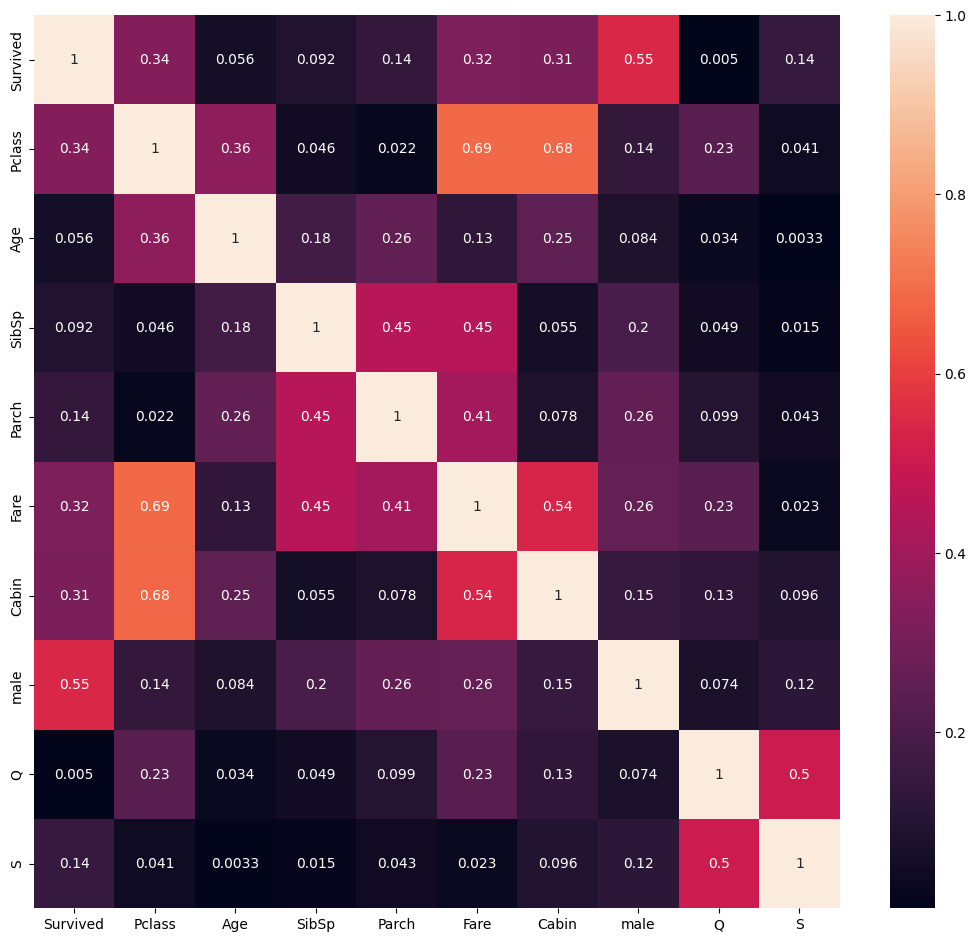

In [ ]:
corrMatrix = train5.corr(method= 'spearman', min_periods=12) # Use spearman for non-linear
fig, ax = plt.subplots(figsize= (13,11.6))
sn.heatmap(abs(corrMatrix), annot=True, cbar= True)

**Observation:**
1.   Feature looks nicely correlated with each other. None of the feature is correlated too much with other feature.
2.   No need to drop or prepare any feature from this inspection.

# Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_train = StandardScaler()
sc_test = StandardScaler()  # I am using two different scalers for training and testing data to avoid bias in the model
X_train = sc_train.fit_transform(X_train)
X_test = sc_test.fit_transform(X_test)

# **Logistic Regression**

0.8146067415730337 



Text(20.72222222222222, 0.5, 'Truth')

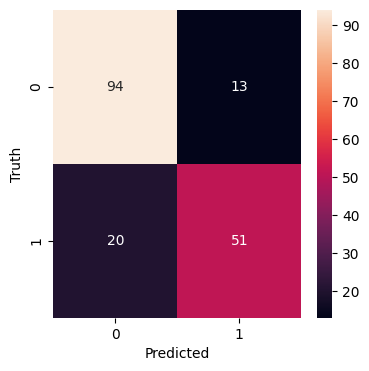

In [ ]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression()
model_1.fit(X_train,y_train)

print(model_1.score(X_test,y_test), '\n')

from sklearn.metrics import confusion_matrix
y_predicted1 = model_1.predict(X_test)

cm_1 = confusion_matrix(y_test.astype('int'), y_predicted1)

import seaborn as sn
plt.figure(figsize= (4,4))
sn.heatmap(cm_1, annot=True, cbar= True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# **Decision Tree Classification**

0.797752808988764


Text(20.72222222222222, 0.5, 'Truth')

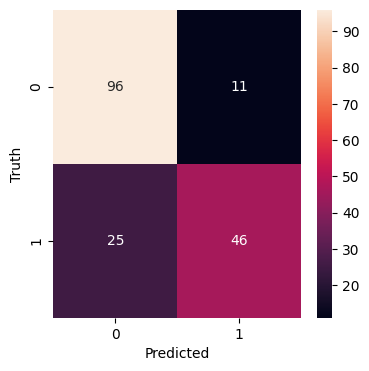

In [ ]:
from sklearn import tree
model_6 = tree.DecisionTreeClassifier()
model_6.fit(X_train, y_train)

print(model_6.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
y_predicted6 = model_6.predict(X_test)

cm_6 = confusion_matrix(y_test.astype('int'), y_predicted6)

import seaborn as sn
plt.figure(figsize= (4,4))
sn.heatmap(cm_6, annot=True, cbar= True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# **Random Forest Classification**

0.797752808988764


Text(20.72222222222222, 0.5, 'Truth')

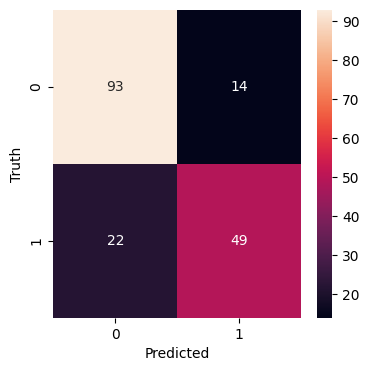

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_2 = RandomForestClassifier(max_depth=10, n_estimators=10)
model_2.fit(X_train, y_train)

print(model_2.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
y_predicted2 = model_2.predict(X_test)

cm_2 = confusion_matrix(y_test.astype('int'), y_predicted2)

import seaborn as sn
plt.figure(figsize= (4,4))
sn.heatmap(cm_2, annot=True, cbar= True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# **Support Vector Classification**

0.8033707865168539


Text(20.72222222222222, 0.5, 'Truth')

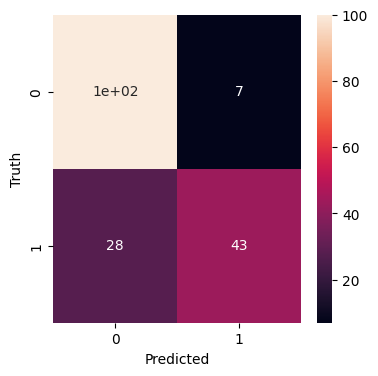

In [ ]:
from sklearn.svm import SVC
model_4 = SVC()
model_4.fit(X_train, y_train)

print(model_4.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
y_predicted4 = model_4.predict(X_test)

cm_4 = confusion_matrix(y_test, y_predicted4)

import seaborn as sn
plt.figure(figsize= (4,4))
sn.heatmap(cm_4, annot=True, cbar= True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# **Naive Bayes Classifier**

0.7696629213483146


Text(20.72222222222222, 0.5, 'Truth')

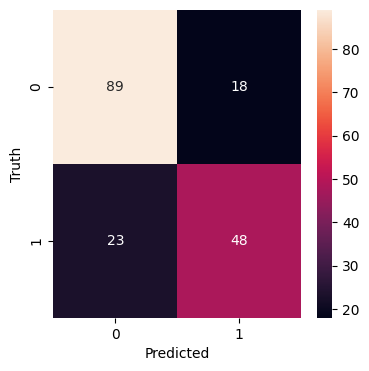

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_5 = GaussianNB()
model_5.fit(X_train, y_train)

print(model_5.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
y_predicted5 = model_5.predict(X_test)

cm_5 = confusion_matrix(y_test, y_predicted5)

import seaborn as sn
plt.figure(figsize= (4,4))
sn.heatmap(cm_5, annot=True, cbar= True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# **Nural Network**

Epoch 1/50
23/23 [==============================] - 1s 2ms/step - loss: 0.6214 - accuracy: 0.7423
Epoch 2/50
23/23 [==============================] - 0s 2ms/step - loss: 0.4993 - accuracy: 0.7704
Epoch 3/50
23/23 [==============================] - 0s 2ms/step - loss: 0.4512 - accuracy: 0.8183
Epoch 4/50
23/23 [==============================] - 0s 2ms/step - loss: 0.4298 - accuracy: 0.8225
Epoch 5/50
23/23 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.8197
Epoch 6/50
23/23 [==============================] - 0s 2ms/step - loss: 0.4139 - accuracy: 0.8296
Epoch 7/50
23/23 [==============================] - 0s 2ms/step - loss: 0.4011 - accuracy: 0.8239
Epoch 8/50
23/23 [==============================] - 0s 2ms/step - loss: 0.3936 - accuracy: 0.8380
Epoch 9/50
23/23 [==============================] - 0s 2ms/step - loss: 0.3884 - accuracy: 0.8366
Epoch 10/50
23/23 [==============================] - 0s 3ms/step - loss: 0.3920 - accuracy: 0.8338
Epoch 11/50
23/23 [

Text(20.72222222222222, 0.5, 'Truth')

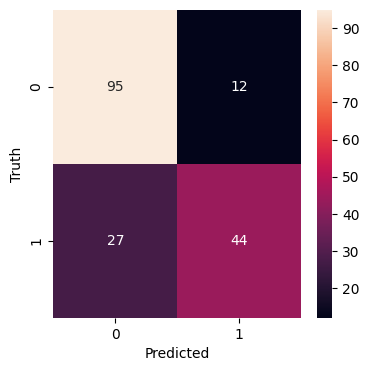

In [ ]:
import tensorflow as tf
from tensorflow import keras

model_3 = keras.Sequential([
                  keras.layers.Dense(64, input_shape=(9,), activation='relu'),
                  keras.layers.Dense(64, activation='relu'),
                  keras.layers.Dense(64, activation='relu'),
                  keras.layers.Dense(32, activation='relu'),
                  keras.layers.Dense(2, activation='softmax')
])
model_3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model_3.fit(X_train, y_train, epochs=50)

from sklearn.metrics import confusion_matrix

y_prob = model_3.predict(X_test)
y_predicted3 = [np.argmax(i) for i in y_prob]

cm_3 = confusion_matrix(y_test.astype('int'), y_predicted3)

import seaborn as sn
plt.figure(figsize= (4,4))
sn.heatmap(cm_3, annot=True, cbar= True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# **K-Nearest Neighbors**

0.8033707865168539


Text(20.72222222222222, 0.5, 'Truth')

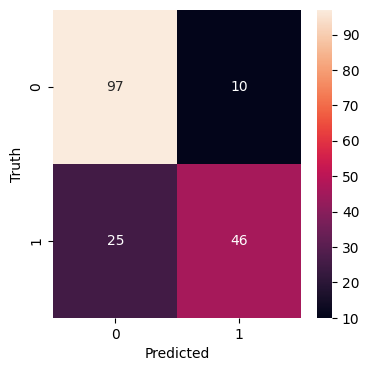

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_7 = KNeighborsClassifier(n_neighbors=10)
model_7.fit(X_train, y_train)

print(model_7.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
y_predicted7 = model_7.predict(X_test)

cm_7 = confusion_matrix(y_test, y_predicted7)

import seaborn as sn
plt.figure(figsize= (4,4))
sn.heatmap(cm_7, annot=True, cbar= True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# **Hyper parameter for Random Forest Classifier**

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(RandomForestClassifier(), {
    'max_depth': [1, 10, 20, 50],
    'n_estimators': [1, 10, 20, 50]
 }, scoring= 'accuracy'
)

clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 10, 20, 50],
                         'n_estimators': [1, 10, 20, 50]},
             scoring='accuracy')

In [ ]:
result = pd.DataFrame(clf.cv_results_)
print('Best parameters are:',clf.best_params_)

Best parameters are: {'max_depth': 10, 'n_estimators': 50}


# Ensemble Model

In [ ]:
y_pred = y_predicted1 + y_predicted2 + y_predicted3 + y_predicted4 + y_predicted5 + y_predicted6 + y_predicted7

In [ ]:
final_pred = [0 if i < 3.5 else 1 for i in y_pred ]

Text(20.72222222222222, 0.5, 'Truth')

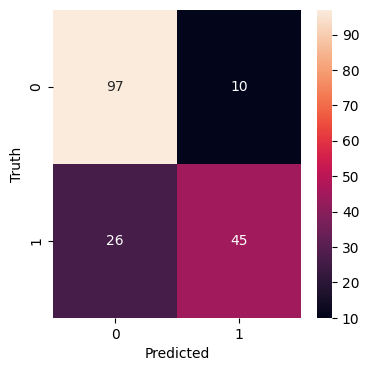

In [ ]:
cm_7 = confusion_matrix(y_test, final_pred)

import seaborn as sn
plt.figure(figsize= (4,4))
sn.heatmap(cm_7, annot=True, cbar= True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, final_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       107
           1       0.82      0.63      0.71        71

    accuracy                           0.80       178
   macro avg       0.80      0.77      0.78       178
weighted avg       0.80      0.80      0.79       178

